# 4: Sentiment analysis on Irish and Finnish newspaper aticles regarding homelessness

### Irish Independent

In [1]:
#!pip install newspaper3k

In [2]:
# Suppress any warnings
import warnings
warnings.filterwarnings('ignore')

from statsmodels.tools.sm_exceptions import ValueWarning
warnings.simplefilter('ignore', ValueWarning)

In [3]:
from newspaper import Article
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
nltk.download('names')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
stem = PorterStemmer()
from nltk.corpus import names
from textblob import TextBlob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import sqrt
import textwrap

# Load the stop words
stop_words = set(stopwords.words("english"))
#Load some names
all_names = set(names.words())

[nltk_data] Downloading package punkt to /home/ciara/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/ciara/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/ciara/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/ciara/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package names to /home/ciara/nltk_data...
[nltk_data]   Package names is already up-to-date!


## Functions

In [4]:
# Function to wrap graph labels
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)

In [5]:
# A function to remove all characters that aren't in the alphabet
def is_letter_only(word):
    for char in word:
        if not char.isalpha():
            return False
    return True

In [6]:
stemmed_filtered_cleaned = []

#Function to lowercase, filter stop words and names, remove punctuation and stem the articles
def sfc_fn(article):
    doc = article.text.lower()
    stemmed_filtered_cleaned = ' '.join(stem.stem(word) for word in doc.split() if is_letter_only(word) and word not in all_names)
    return(stemmed_filtered_cleaned)

In [7]:
def sentiment_analysis(article):
    txt = TextBlob(article)
    a= txt.sentiment.polarity
    b= txt.sentiment.subjectivity
    return(a,b)

## Gathering the articles

Search term: Finland's response to homelessness

### The Irish Independent

In [8]:
url = "https://www.independent.ie/irish-news/finnish-model-shows-how-a-more-radical-approach-could-solve-homeless-problem/37456401.html"

ii_article = Article(url, language="en") # en for English
 
#To download the article
ii_article.download()
 
#To parse the article
ii_article.parse()
 
#To perform natural language processing ie. nlp
ii_article.nlp()

In [9]:
print(ii_article.text)

The Government needs to adopt a more radical approach if it wants to solve the homelessness crisis, according to Juha Kaakinen, the chief executive of the Y Foundation, which owns a stock of 16,700 low-cost social housing units in Finland.

In Ireland yesterday to attend a seminar hosted by the Ambassador of Finland Jaana Teckenberg on 'Housing First', a strategy to deal with those in long-term homelessness, Mr Kaakinen said Finland had completely transformed its approach to homelessness in 2008.

Instead of managing homelessness, the Finnish government announced its intention to end it, opting to transform temporary accommodation, like shelters and hostels, into permanent housing units with on-site support services.

For instance, the last large shelter in Helsinki, a 250-bed building, was converted in 2012 into 81 independent apartments, in which 88 residents now permanently reside.

In total, since 2008, 3,500 of these units have been provided as part of the new policy.

The result 

### Irish Times

In [10]:
from newspaper import Article
 
#A new article from TOI
url = "https://www.irishtimes.com/ireland/social-affairs/2023/05/09/homeless-response-should-focus-on-needs-of-children/"

#For different language newspaper refer above table
it_article = Article(url, language="en") # en for English
 
#To download the article
it_article.download()
 
#To parse the article
it_article.parse()
 
#To perform natural language processing ie. nlp
it_article.nlp()

In [11]:
print(it_article.text)

A new campaign seeks to require local authorities to take the ‘best interests of the child’ into account when working with families who are homeless. Photograph: PA Images

A campaign to require local authorities to take the ‘best interests of the child’ into account when working with families who are homeless will today be unveiled by Focus Ireland.

At the end of March 2023, there were 3,472 children in emergency accommodation, an increase of 662 children since March last year.

Mike Allen, the director of advocacy with Focus Ireland, told RTÉ Radio’s Morning Ireland that local authority staff were working extremely hard to deal with this crisis but needed more direction, training and support.

Focus Ireland is calling for the reintroduction and passing into law of the Housing (Homeless Families) Bill 2017, a piece of Private Members’ legislation introduced into the Dáil in 2017 by Jan O’Sullivan.

READ MORE

The Bill aimed to amend the 1988 Housing Act so that local authorities woul

### The Journal

In [12]:
from newspaper import Article
 
#A new article from TOI
url = "https://www.thejournal.ie/finland-homeless-housing-first-ireland-4303419-Oct2018/"

#For different language newspaper refer above table
j_article = Article(url, language="en") # en for English
 
#To download the article
j_article.download()
 
#To parse the article
j_article.parse()
 
#To perform natural language processing ie. nlp
j_article.nlp()

In [13]:
print(j_article.text)

LAST MONTH, THE government announced its intention to expand its Housing First plan, which aims to reduce and end rough sleeping and long-term homelessness, from Dublin and across the country.

In the past, homelessness services in Ireland and much of Europe and the US were geared towards a staircase model of recovery.

Under this, a homeless person would have to advance towards a home by first proving that they could live in a homeless shelter, maybe successfully complete drug or alcohol rehabilitation programmes, and essentially work their up way to a secure, permanent home.

Housing First flipped this model on its head – with a secure, safe, permanent home with support being the primary goal; and recovery, therapy or whatever else is needed coming after that.

The approach was pioneered in 1992 in New York by Dr Sam Tsemberis. In Ireland, a shift away from the staircase model and towards Housing First was signalled in the 2011 Programme for Government.

While this programme has been

In [14]:
j_article_processed = sfc_fn(j_article)

### Helsinki Times

In [15]:
url = "https://www.helsinkitimes.fi/finland/finland-news/domestic/22934-homelessness-can-be-eradicated-by-2027-with-close-cooperation-report.html"

ht_article = Article(url, language="en") # en for English
 
#To download the article
ht_article.download()
 
#To parse the article
ht_article.parse()
 
#To perform natural language processing ie. nlp
ht_article.nlp()

In [16]:
print(ht_article.text)

The report commissioned by the Ministry of the Environment explores the trends in homelessness and means by which homelessness can be eradicated. Rapporteur Juha Kaakinen urges to continue the work in line with the Housing First principle and to further develop this so that support is readily available and serves homelessness that may be due to varying reasons in diverse ways. A key focus should be on groups that need services and support the most.

"Today, there is a broad consensus on the need to eradicate homelessness in Finland, but some time ago this was considered a utopian target. Now we just have to take concrete steps to achieve it. We need a national programme to eradicate homelessness by 2027. It is important that all political parties will commit to this programme and to ensuring adequate resources for it," Minister of the Environment and Climate Change Maria Ohisalo says.

Finland has managed to reverse the trend in homelessness

Finland is the only country in Europe where

### The Guardian

#1

In [17]:
url = "https://www.theguardian.com/cities/2019/jun/03/its-a-miracle-helsinkis-radical-solution-to-homelessness"

g_article = Article(url, language="en") # en for English
 
#To download the article
g_article.download()
 
#To parse the article
g_article.parse()
 
#To perform natural language processing ie. nlp
g_article.nlp()

In [18]:
print(g_article.text)

Tatu Ainesmaa turns 32 this summer, and for the first time in more than a decade he has a home he can truly say is his: an airy two-room apartment in a small, recently renovated block in a leafy suburb of Helsinki, with a view over birch trees.

“It’s a big miracle,” he says. “I’ve been in communes, but everyone was doing drugs and I’ve had to get out. I’ve been in bad relationships; same thing. I’ve been on my brother’s sofa. I’ve slept rough. I’ve never had my own place. This is huge for me.”

Downstairs in the two-storey block is a bright communal living and dining area, a spotless kitchen, a gym room and a sauna (in Finland, saunas are basically obligatory). Upstairs is where the 21 tenants, men and women, most under 30, live.

It was clear to everyone the old system wasn’t working. We needed radical change Juha Kaakinen

It is important that they are tenants: each has a contract, pays rent and (if they need to) applies for housing benefit. That, after all, is all part of having a 

#2

In [19]:
url = "https://www.theguardian.com/housing-network/2017/mar/22/finland-solved-homelessness-eu-crisis-housing-first"

g2_article = Article(url, language="en") # en for English
 
#To download the article
g2_article.download()
 
#To parse the article
g2_article.parse()
 
#To perform natural language processing ie. nlp
g2_article.nlp()

In [20]:
print(g2_article.text)

This week’s report by EU housing organisation Feantsa has found every country in the EU in the midst of a crisis of homelessness and housing exclusion – with one exception: Finland.

Juha Kaakinen. Photograph: Juha Kaakinen

So how has the country done it? By giving homeless people permanent housing as soon as they become homeless, rather than muddling along with various services that may eventually result in an offer of accommodation.

It’s an idea is being considered in the UK by communities secretary Sajid Javid. We spoke to Juha Kaakinen, chief executive of the Y-Foundation, which provides 16,300 low cost flats to homeless people in Finland, to find out more:

What is Housing First?

Housing First means ending homelessness instead of managing it. The basic idea is to offer permanent housing and needs-based support for homeless people instead of temporary accommodation in hostels or in emergency shelters. Permanent housing means an independent rental flat with own rental contract.



### Politico

In [21]:
url = "https://www.politico.eu/article/to-help-the-homeless-helsinki-finland-close-a-shelter/"

p_article = Article(url, language="en") # en for English

#To download the article
p_article.download()
 
#To parse the article
p_article.parse()
 
#To perform natural language processing ie. nlp
p_article.nlp()

In [22]:
print(p_article.text)

This article is part of the series Home Truths: Europe’s Housing Challenge.

HELSINKI — Finland’s experiment in ending rough sleeping has caught the attention of policymakers for one reason: It’s working.

Called Housing First, the Finnish model aggressively closed homeless shelters, calling them traps, and did not require participants battling addictions to recover before receiving keys to a home.

“We used to think that people somehow needed to get sober in order to be able to live in a flat,” said Helsinki Mayor Jan Vapaavuori. “But then we turned that around: You need an apartment in order to get sober.”

Vapaavuori is Finland’s former housing minister, a post he held when the Housing First model was first developed. Now his job is to implement it on the municipal level.

Housing First’s biggest innovation is right in its name.

The program is based on the comically simple idea that to end homelessness, give people homes.

Amid a rising homeless crisis across Europe, Housing First,

### CBC

#1

In [23]:
url = "https://www.cbc.ca/news/canada/london/london-wants-to-eradicate-homelessness-here-s-how-finland-is-doing-it-1.6728398"

cbc_article = Article(url, language="en") # en for English

#To download the article
cbc_article.download()
 
#To parse the article
cbc_article.parse()
 
#To perform natural language processing ie. nlp
cbc_article.nlp()

In [24]:
print(cbc_article.text)

A successful Finnish plan to eradicate homelessness is one London may want to consider as it works to redesign housing and health services.

This past week, participants from more than 60 community groups in London wrapped up the last of three housing summits that will lead to a new plan to help the city's nearly 1,900 unhoused. That count was done in the fall and has nearly doubled in two years.

Londoners will learn more about what was discussed when the plan is made public in late February. Meanwhile, Finland committed to eradicating homelessness several years ago, and the statistics in that country show it's working.

London Morning host Rebecca Zandbergen spoke to the Y-Foundation's Juha Kaakinen, the biggest Finnish NGO providing housing for homeless people, about the country's plan. Here's part of that conversation:

Juha Kaakinen is the architect of Finland's national Housing First program. (Kirsi Tuura)

What is Finland's plan to eradicate homelessness?

Since several years, h

#2

In [25]:
url = "https://www.cbc.ca/radio/sunday/the-sunday-edition-for-january-26-2020-1.5429251/housing-is-a-human-right-how-finland-is-eradicating-homelessness-1.5437402"

cbc2_article = Article(url, language="en") # en for English

#To download the article
cbc2_article.download()
 
#To parse the article
cbc2_article.parse()
 
#To perform natural language processing ie. nlp
cbc2_article.nlp()

In [26]:
print(cbc2_article.text)

There are more than a million empty homes in Canada and on any given night at least 35,000 Canadians are homeless. They pack into overflowing, often dangerous, shelters or they hunker down outside, hoping the elements will be kinder to them than the conditions indoor.

Juha Kaakinen is the architect of Finland's national Housing First program. (Kirsi Tuura)

In the 1980s, a Canadian psychologist working in New York had an idea: maybe the best way to solve the problem of homelessness was to give people homes. Sam Tsemberis was one of the earliest proponents of a model known as Housing First. The idea was viewed as outlandish and unworkable.

Skeptics argued that complex issues like addiction and mental health had to be addressed first before someone was a suitable candidate for long-term housing. How would the cost be justified to hardworking taxpayers?

But the idea has caught on.

Housing First projects have appeared in municipalities across Asia, Europe and North America, including M

### Toronto Star

In [27]:
url = "https://www.thestar.com/opinion/contributors/2023/04/20/how-finland-managed-to-virtually-end-homelessness.html?rf"

ts_article = Article(url, language="en") # en for English

#To download the article
ts_article.download()
 
#To parse the article
ts_article.parse()
 
#To perform natural language processing ie. nlp
ts_article.nlp()

In [28]:
print(ts_article.text)

Determined to pack more homeless people into Toronto’s overcrowded shelters, officials have come up with a solution: reduce the number of inches between beds.

There’s a certain logic to this and it may be the best we can do — given our refusal to consider solutions that would actually be innovative.

And so it is that here in Toronto we’re busy studying how to jam more beds into already-cramped shelters, while over in Finland — where innovation is more than just another word for privatization — they’ve managed to virtually end homelessness.

OK, so the Finns are more generous and just shell out a lot more to help the homeless, right? Actually not. The Finns are simply smarter.

Instead of abandoning the homeless, they housed them. And that led to an insight: people tend to function better when they’re not living on the street or under a bridge. Who would have guessed?

It turns out that, given a place to live, Finland’s homeless were better able to deal with addictions and other probl

### Christian Science monitor

In [29]:
url = "https://www.csmonitor.com/World/Europe/2018/0321/Finland-s-homeless-crisis-nearly-solved.-How-By-giving-homes-to-all-who-need"

cs_article = Article(url, language="en") # en for English

#To download the article
cs_article.download()
 
#To parse the article
cs_article.parse()
 
#To perform natural language processing ie. nlp
cs_article.nlp()

In [30]:
print(cs_article.text)

As anyone who has visited Europe recently can attest, the scourge of homelessness has reached epidemic proportions.

The only exception to the trend is Finland, according to FEANTSA, the European Federation of National Organizations Working with the Homeless. There, homelessness is, remarkably, on the decline.

Per the latest statistics, the number of homeless people in Finland has declined from a high of 18,000 30 years ago, to approximately 7,000: the latter figure includes some 5,000 persons who are temporarily lodging with friends or relatives. In short, the problem has basically been solved.

At the core of this was a move away from the so-called “staircase model,” whereby a homeless person moved from one social rehabilitation level to another, with an apartment waiting for him or her at the highest step. Instead, Finland opted to give housing to the homeless from the start, nationwide, so as to allow them a stable environment to stabilize their lives.

“Basically, we decided that

### YLE

In [31]:
url = "https://yle.fi/a/3-12409059"

yle_article = Article(url, language="en") # en for English

#To download the article
yle_article.download()
 
#To parse the article
yle_article.parse()
 
#To perform natural language processing ie. nlp
yle_article.nlp()

In [32]:
print(yle_article.text)

Long-term homelessness increased this past year, despite an overall decrease of homelessness.

Despite progress through the 'Housing First' initiative, long-term homelessness has increased in Finland.

Finland's policy of 'Housing First' has often been lauded in international media, with claims that the country has "solved homelessness".

The reality is that homelessness in Finland has been reduced at a record rate through the 'Housing First' principle, but around 4,000 in Finland remain without a home and the number of long-term homeless individuals rose in the past year.

The 'Housing First' initiative has made the primary focus of helping homeless people getting them long-term, stable housing. The programme holds that only after housing has been provided should any other problems, such as substance abuse or mental health issues, be dealt with.

The government program has a goal of eradicating homelessness by 2027.

In Helsinki, the number of homeless people changed from 4,340 in 202

## Sentiment analysis

In [33]:
sentiment_df = pd.DataFrame(columns=['Newspaper', 'Polarity', 'Subjectivity'])
newspapers = ["CBC", "The Irish Independent", "Irish Times", "The Journal", "Helsinki Times", "YLE", "The Guardian",
              "The Guardian", "Politico", "CBC", "Toronto Star", "The Christian Science Monitor"]
articles = [cbc2_article, ii_article, it_article, j_article, ht_article, yle_article, g_article, g2_article,
            p_article, cbc_article, ts_article, cs_article]
sentiment_df['Newspaper'] = newspapers
count=0
for i in articles:
    article_processed = sfc_fn(i)
    sentiment_analysis(article_processed)
    sentiment_df["Polarity"][count] = sentiment_analysis(article_processed)[0]
    sentiment_df["Subjectivity"][count] = sentiment_analysis(article_processed)[1]
    count += 1

In [34]:
sentiment_df

,Newspaper,Polarity,Subjectivity
0,CBC,0.145386,0.38831
1,The Irish Independent,0.08581,0.343444
2,Irish Times,0.14214,0.223685
3,The Journal,0.077904,0.331291
4,Helsinki Times,0.161925,0.546147
5,YLE,0.038954,0.404193
6,The Guardian,0.163302,0.3971
7,The Guardian,0.031778,0.390471
8,Politico,0.114703,0.365956
9,CBC,0.111333,0.390678


In [35]:
sentiment_df["Bias"] = ["LEFT-CENTER", "RIGHT-CENTER", "LEFT-CENTER", "LEFT-CENTER", "LEFT-CENTER", "CENTRE",
                        "LEFT-CENTER", "LEFT-CENTER", "LEFT-CENTER", "LEFT-CENTER", "LEFT-CENTER", "LEFT"]
sentiment_df["Country"] = ["Canada", "Ireland", "Ireland", "Ireland", "Finland", "Finland", "UK", "UK", "US",
                           "Canada", "Canada", "US"]

In [36]:
sentiment_df

,Newspaper,Polarity,Subjectivity,Bias,Country
0,CBC,0.145386,0.38831,LEFT-CENTER,Canada
1,The Irish Independent,0.08581,0.343444,RIGHT-CENTER,Ireland
2,Irish Times,0.14214,0.223685,LEFT-CENTER,Ireland
3,The Journal,0.077904,0.331291,LEFT-CENTER,Ireland
4,Helsinki Times,0.161925,0.546147,LEFT-CENTER,Finland
5,YLE,0.038954,0.404193,CENTRE,Finland
6,The Guardian,0.163302,0.3971,LEFT-CENTER,UK
7,The Guardian,0.031778,0.390471,LEFT-CENTER,UK
8,Politico,0.114703,0.365956,LEFT-CENTER,US
9,CBC,0.111333,0.390678,LEFT-CENTER,Canada


## Visualisation - Political leaning / country

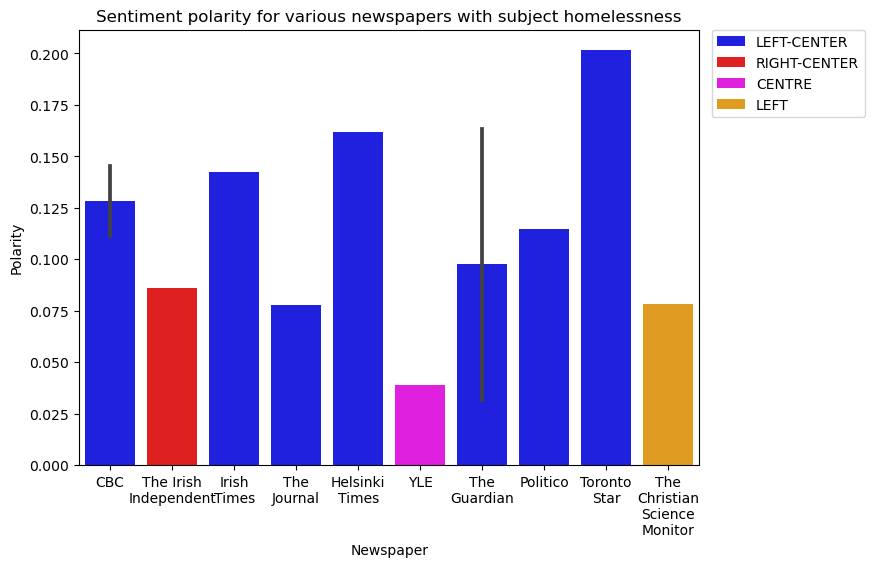

In [37]:
#Median central-tendency is used as data is non-parametric
a4_dims = (8, 8/sqrt(2))
fig, ax = plt.subplots(figsize=a4_dims)
ax=sns.barplot(x="Newspaper", y="Polarity", hue="Bias", data=sentiment_df, dodge=False, palette = ["blue", "red", "magenta", "Orange"])
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title("Sentiment polarity for various newspapers with subject homelessness", size = 12)
wrap_labels(ax, 10)

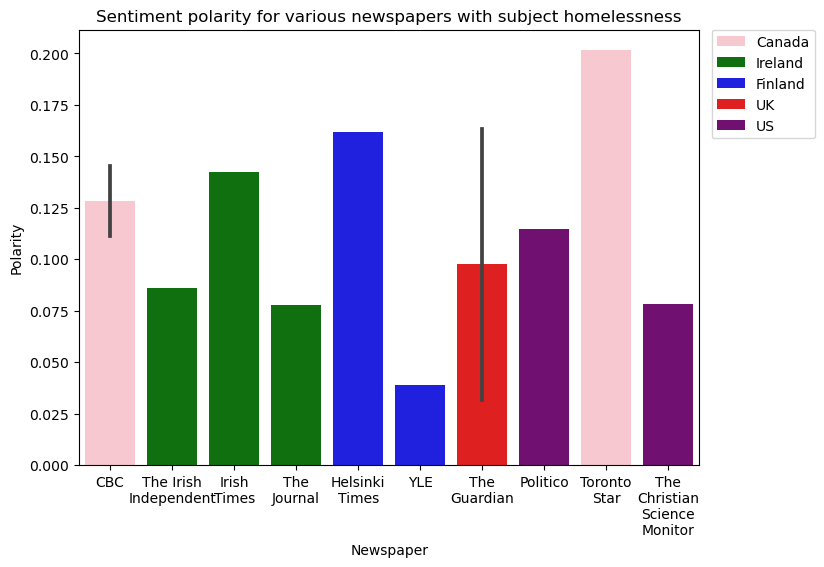

In [38]:
#Median central-tendency is used as data is non-parametric
#Canada: pink, Ireland: Green, UK: red, Finland: blue, US: purple
a4_dims = (8, 8/sqrt(2))
fig, ax = plt.subplots(figsize=a4_dims)
ax=sns.barplot(x="Newspaper", y="Polarity", hue="Country", data=sentiment_df, dodge=False,
               palette = ["pink", "green", "blue", "red", "purple"])
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title("Sentiment polarity for various newspapers with subject homelessness", size = 12)
wrap_labels(ax, 10)

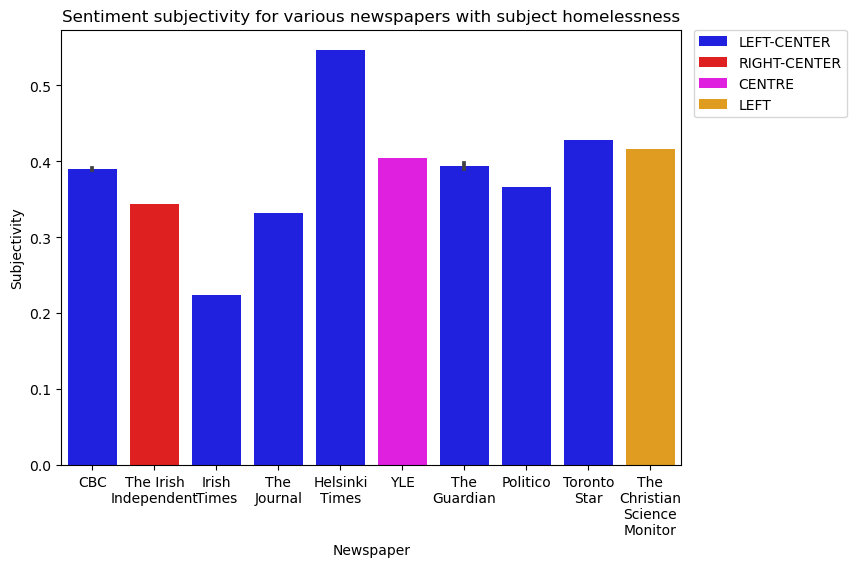

In [39]:
#Median central-tendency is used as data is non-parametric
a4_dims = (8, 8/sqrt(2))
fig, ax = plt.subplots(figsize=a4_dims)
ax=sns.barplot(x="Newspaper", y="Subjectivity", hue="Bias", data=sentiment_df, dodge=False, palette = ["blue", "red", "magenta", "Orange"])
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title("Sentiment subjectivity for various newspapers with subject homelessness", size = 12)
wrap_labels(ax, 10)

## Visualisation - Finland's response to homelessness

In [40]:
sentiment_df = sentiment_df.drop(labels = 2, axis = 0)

In [41]:
sentiment_df

,Newspaper,Polarity,Subjectivity,Bias,Country
0,CBC,0.145386,0.38831,LEFT-CENTER,Canada
1,The Irish Independent,0.08581,0.343444,RIGHT-CENTER,Ireland
3,The Journal,0.077904,0.331291,LEFT-CENTER,Ireland
4,Helsinki Times,0.161925,0.546147,LEFT-CENTER,Finland
5,YLE,0.038954,0.404193,CENTRE,Finland
6,The Guardian,0.163302,0.3971,LEFT-CENTER,UK
7,The Guardian,0.031778,0.390471,LEFT-CENTER,UK
8,Politico,0.114703,0.365956,LEFT-CENTER,US
9,CBC,0.111333,0.390678,LEFT-CENTER,Canada
10,Toronto Star,0.201444,0.427966,LEFT-CENTER,Canada


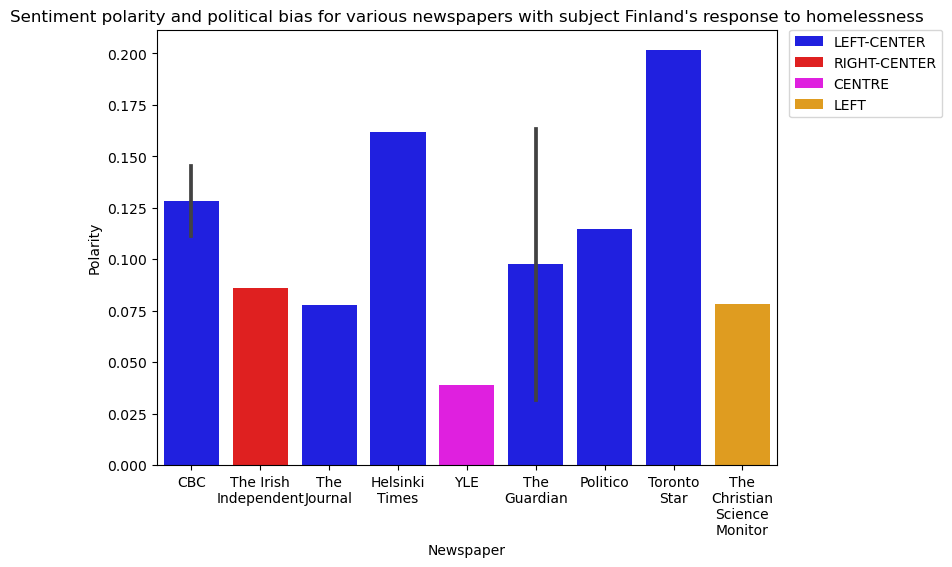

In [48]:
#Median central-tendency is used as data is non-parametric
a4_dims = (8, 8/sqrt(2))
fig, ax = plt.subplots(figsize=a4_dims)
ax=sns.barplot(x="Newspaper", y="Polarity", hue="Bias", data=sentiment_df, dodge=False, palette = ["blue", "red", "magenta", "Orange"])
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title("Sentiment polarity and political bias for various newspapers with subject Finland's response to homelessness", size = 12)
wrap_labels(ax, 10)

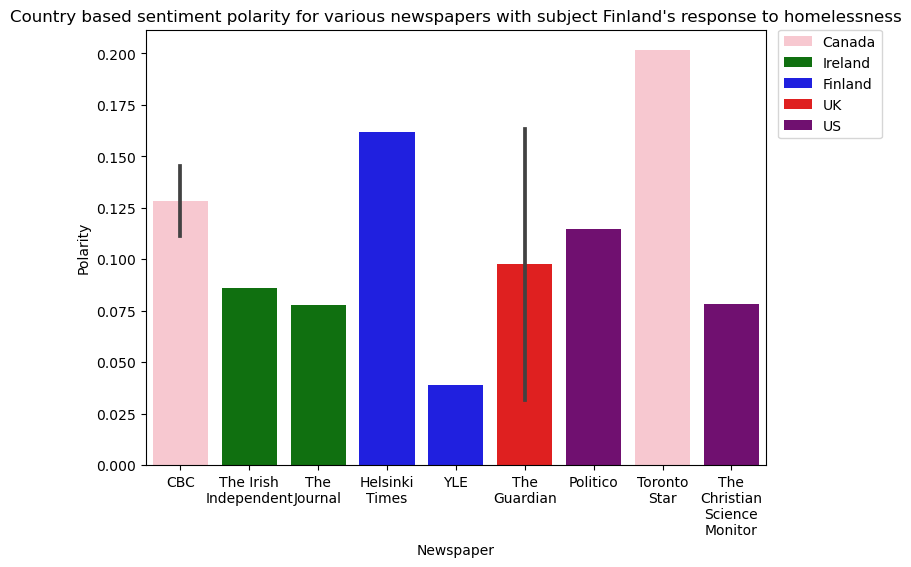

In [50]:
#Median central-tendency is used as data is non-parametric
a4_dims = (8, 8/sqrt(2))
fig, ax = plt.subplots(figsize=a4_dims)
ax=sns.barplot(x="Newspaper", y="Polarity", hue="Country", data=sentiment_df, dodge=False,
               palette = ["pink", "green", "blue", "red", "purple"])
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title("Country based sentiment polarity for various newspapers with subject Finland's response to homelessness", size = 12)
wrap_labels(ax, 10)

## References

Natural Language Toolkit (2023). NLTK Project. url: https : / / www . nltk . org/ (visited on
05/25/2023).

newspaper3k 0.2.8 (2023). python.org. url: https://pypi.org/project/newspaper3k/ (visited
on 05/26/2023).

22Newspaper: Article scraping & curation (Python) (2023). geeksforgeeks.org. url: https://www.
geeksforgeeks . org / newspaper - article - scraping - curation - python/ (visited on
05/16/2023).

Media Bias / Fact Check (2023). https://mediabiasfactcheck.com/. url: https://mediabiasfactc
heck.com/ (visited on 05/10/2023).